In [43]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Indizes

In [44]:
# ind_gb     = ['^FTSE']
ind_german   = ['^GDAXI', '^MDAXI','^SDAXI']
ind_euro     = ['^STOXX50E']
ind_usa      = ['^DJI','^GSPC','^IXIC']        # DowJones, S&P 500, NASDAQ
ind_russland = ['IMOEX.ME', 'RTSI.ME']         # MOEX Russia Index, RTS Index
ind_japan  =   ['^N225']
ind_hong   =   ['^HSI']

vix = '^VIX'
msci = 'MSCI'

all_indizes = ind_german + ind_euro + ind_usa + ind_japan + ind_hong
all_labels  = ['DAX', 'MDAX', 'SDAX', 'STOXX50E', 'DowJones', 'SP500', 'NASDAQ', 'Nikkei225', 'HANGSENG']

imp_indizes = ['^GDAXI','^FTSE','^DJI',   '^GSPC','^N225',      '^HSI']
labels  = ['DAX','   FTSE','DowJones','SP500','Nikkei225', 'HANGSENG']

In [48]:
def read_and_merge(wkns:[]=None,names:[]=None,start=None,stop=None):
    import yfinance as yf
    df_list = []
    for wkn in wkns:
        stock = yf.Ticker(wkn)
        df = stock.history(start=start, end=stop)
        df_list.append(df)
    stocks = pd.concat(df_list, axis=1,keys=names)
    stocks.columns.names = ['Stock Ticker','Stock Info']
    return stocks

def returns(stocks_df=None,labels:[]=None):
    returns = pd.DataFrame()
    for label in  labels:
        returns[label+' Return'] = stocks_df[label]['Close'].pct_change()

    return returns


indizes_df = read_and_merge(imp_indizes,labels,start="2000-01-01",stop="2021-10-01")
retruns_df = returns(stocks_df=indizes_df,labels=labels)

retruns_df

,DAX Return,FTSE Return,DowJones Return,SP500 Return,Nikkei225 Return,HANGSENG Return
Date,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,-0.012143,-0.009549,NaN,NaN
2000-01-04,-0.024265,NaN,-0.031660,-0.038345,NaN,-0.017088
2000-01-05,-0.012886,-0.019502,0.011340,0.001922,-0.024223,-0.071816
2000-01-06,-0.004176,-0.013571,0.011743,0.000956,-0.020185,-0.043762
...,...,...,...,...,...,...
2021-09-24,-0.007173,-0.003800,0.000954,0.001461,0.020561,-0.013007
2021-09-27,0.002713,0.001688,0.002051,-0.002776,-0.000289,0.000687
2021-09-28,-0.020889,-0.004998,-0.016329,-0.020364,-0.001855,0.012046


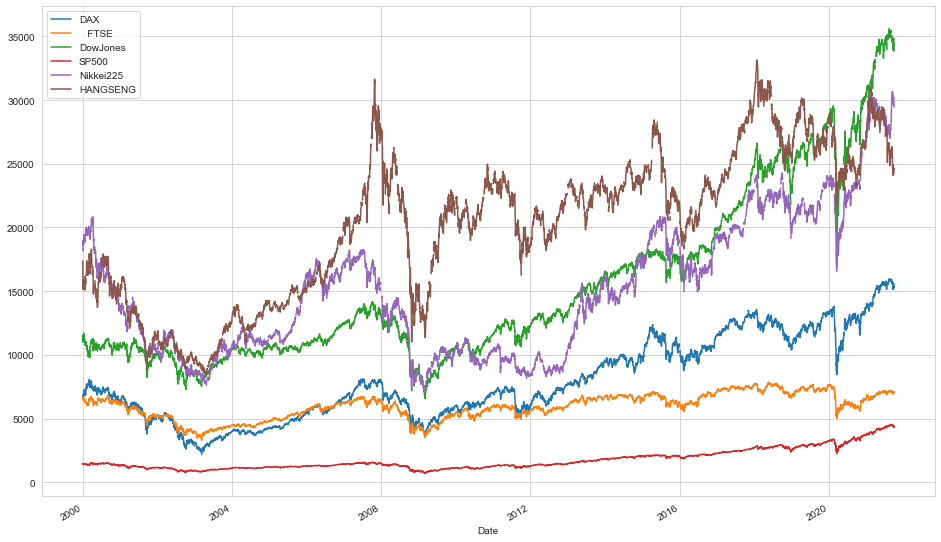

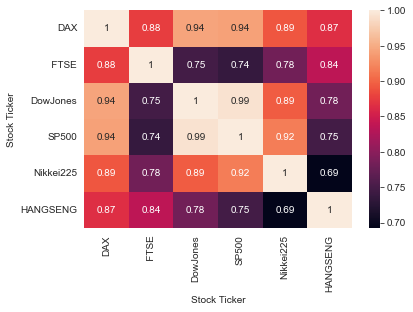

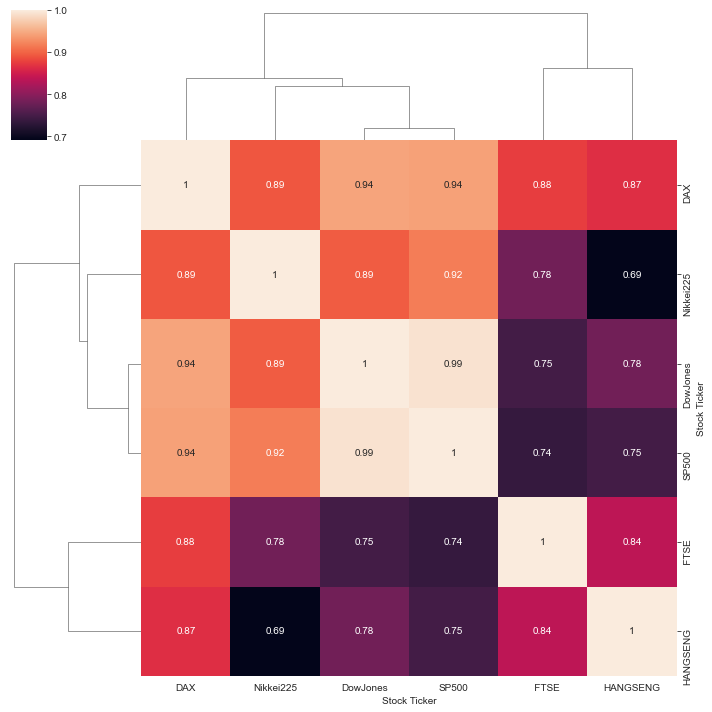

In [46]:
def plot_stocks(df_stock:[]=None,names:[]= None):
    sns.set_style('whitegrid')
    import cufflinks as cf
    cf.go_offline()

    for name in names:
        df_stock[name]['Close'].plot(figsize=(16,10),label=name)


    df_stock.xs(key='Close',axis=1,level='Stock Info').iplot()
    plt.grid(True)
    plt.legend()
    plt.show()
    sns.heatmap(df_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
    sns.clustermap(df_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plot_stocks(df_stock=indizes_df,names=labels)

In [47]:
#for name in ['Vix','MSCI']:
#    indizes_df[name]['Close'].plot(figsize=(16,10),label=name)

#plt.grid(True)
#plt.legend()
#plt.show()

KeyError: 'Vix'

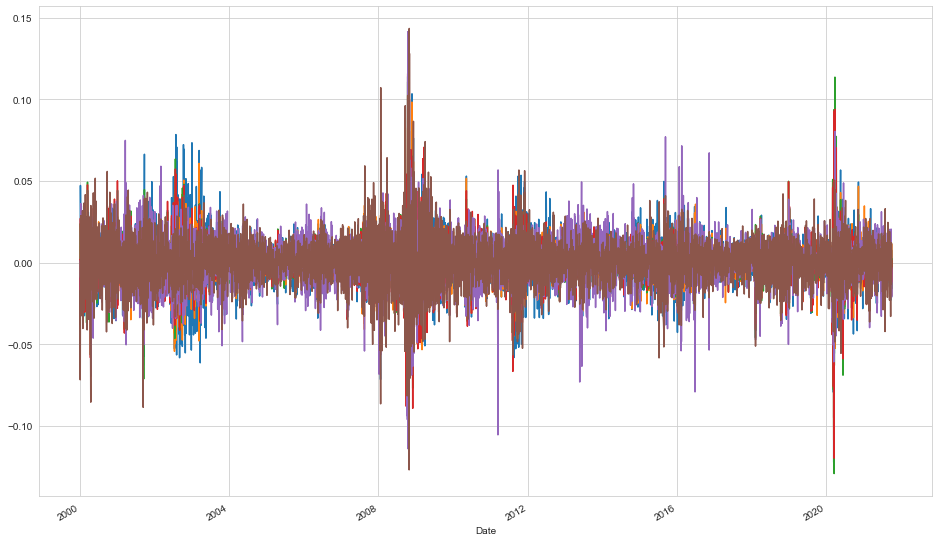

In [59]:
return_labels = [i+' Return' for i in labels]
for name in return_labels:
    retruns_df[name].plot(figsize=(16,10),label=name)

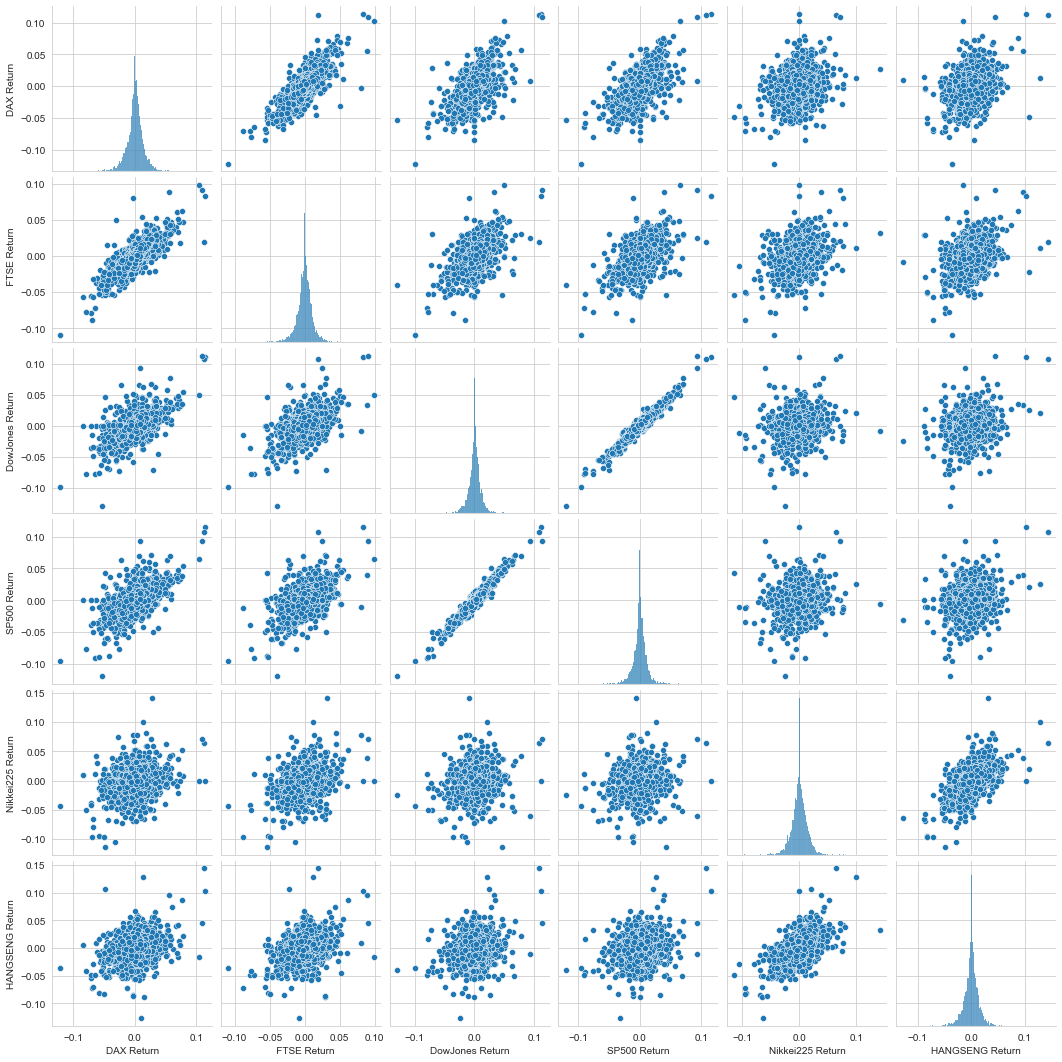

In [55]:
sns.pairplot(retruns_df[1:])
plt.show()